# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

讀取mnist資料

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

將features 轉換為4維矩陣

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

將features 標準化

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

labal 以onehot encoding轉換

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

匯入模組

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

建立keras的sequential

In [7]:
model = Sequential()

建立卷積層1

In [8]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='elu'))

建立池化層1

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

建立卷積層2

In [10]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='elu'))

建立池化層2

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

加入Dropout 避免overfitting

In [12]:
model.add(Dropout(0.25))

建立神經網路(平坦層、隱藏層、輸出層)


建立平坦層

In [13]:
model.add(Flatten())

建立隱藏層

In [14]:
model.add(Dense(128, activation='elu'))

In [15]:
model.add(Dropout(0.5))

建立輸出層

In [16]:
model.add(Dense(10,activation='softmax'))

查看模型

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# 訓練模型

定義訓練

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

開始訓練

In [19]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 8s - loss: 0.3695 - accuracy: 0.8892 - val_loss: 0.0957 - val_accuracy: 0.9718 - 8s/epoch - 52ms/step
Epoch 2/20
160/160 - 4s - loss: 0.1093 - accuracy: 0.9666 - val_loss: 0.0617 - val_accuracy: 0.9821 - 4s/epoch - 23ms/step
Epoch 3/20
160/160 - 3s - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0557 - val_accuracy: 0.9836 - 3s/epoch - 20ms/step
Epoch 4/20
160/160 - 4s - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0469 - val_accuracy: 0.9860 - 4s/epoch - 24ms/step
Epoch 5/20
160/160 - 4s - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0467 - val_accuracy: 0.9867 - 4s/epoch - 24ms/step
Epoch 6/20
160/160 - 3s - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0424 - val_accuracy: 0.9870 - 3s/epoch - 18ms/step
Epoch 7/20
160/160 - 3s - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.0374 - val_accuracy: 0.9882 - 3s/epoch - 18ms/step
Epoch 8/20
160/160 - 3s - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0388 - val_accuracy: 0.9883 - 3s/epoch - 18ms/step
Epoch 9/20
160/1

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

畫出訓練結果

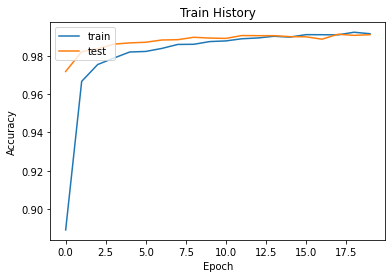

In [21]:
show_train_history('accuracy','val_accuracy')

畫出loss誤差執行結果

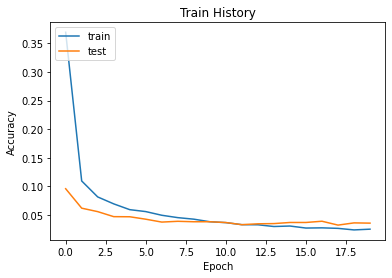

In [22]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [23]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0247 - accuracy: 0.9933


0.9933000206947327

# 預測結果

In [24]:
prediction= np.argmax(model.predict(x_Test),axis=1)

In [25]:
prediction[:10]

array([7, 2, 1, 7, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

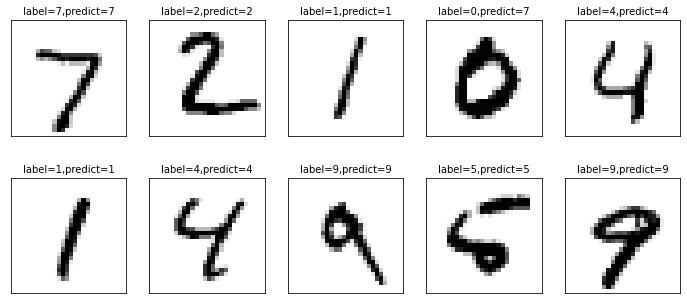

In [27]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [28]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,9,65,248,1,33,62,6,550,0,6
1,0,1114,0,0,0,4,0,17,0,0
2,0,40,875,8,0,1,0,108,0,0
3,0,0,0,988,0,7,0,15,0,0
4,0,9,1,0,773,1,0,190,0,8
5,0,0,1,5,0,883,0,1,0,2
6,0,10,6,0,3,167,769,3,0,0
7,0,0,0,0,0,0,0,1028,0,0
8,0,40,26,152,22,255,0,383,60,36


In [29]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [30]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
2970,5,3
3157,5,3
5937,5,3
